# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Objective:
In earlier days, when all cars were gas or diesel driven, there was enough experience among the staff to determine what cars would sell at a high price. With the introduction of hybrid and electric vehicles and autonomous features, there are different factors that influence the used car sale. Data science can see hidden patterns and provide a better way to determine the factors that drive sale price and help the business make more profits. The objectives for this data science project are:
1. Predict sale price of used car that is yet to be procured by the business
2. The prediction accuracy should be 90% or higher to be deployed
3. Educate on what factors drive the sale price for different category of vehicles.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer

from sklearn import set_config

In [262]:
used_cars = pd.read_csv("data//vehicles.csv")
used_cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [263]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [264]:
used_cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [265]:
df = used_cars.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

In [266]:
used_cars.duplicated().sum()

0

In [267]:
good_model_mfg = used_cars.query('model.notna() and manufacturer.notna()')[['model', 'manufacturer']]
dict_mfg = pd.Series(good_model_mfg.manufacturer.values,index=good_model_mfg.model).to_dict()

In [268]:
def fillManufacturer(x):
    modelvalue = str(x['model'])
    return dict_mfg.get(modelvalue)

print(used_cars.isna().sum())
used_cars['manufacturer'] = used_cars.apply(lambda x : fillManufacturer(x) if (pd.isna(x['manufacturer'])) else x['manufacturer'], axis=1)
used_cars.isna().sum()                              

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [269]:
good_model_cyl = used_cars.query('model.notna() and cylinders.notna()')[['model', 'cylinders']]
dict_cyl = pd.Series(good_model_cyl.cylinders.values,index=good_model_cyl.model).to_dict()


In [270]:
def fillCylinder(x):
    modelvalue = str(x['model'])
    return dict_cyl.get(modelvalue)

print(used_cars.isna().sum())
used_cars['cylinders'] = used_cars.apply(lambda x : fillCylinder(x) if (pd.isna(x['cylinders'])) else x['cylinders'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [271]:
good_cond = used_cars.query('odometer.notna() and year.notna() and condition.notna()')[['odometer', 'year', 'condition']]
good_cond['odometer'] = good_cond.odometer.round(-4)
good_cond['odoyear'] = good_cond['odometer'].astype('str') + "_" + good_cond['year'].astype('str')
dict_cond = pd.Series(good_cond.condition.values,index=good_cond.odoyear).to_dict()
dict_cond

{'60000.0_2014.0': 'good',
 '70000.0_2010.0': 'good',
 '20000.0_2020.0': 'good',
 '40000.0_2017.0': 'good',
 '130000.0_2013.0': 'excellent',
 '70000.0_2012.0': 'excellent',
 '30000.0_2016.0': 'good',
 '40000.0_2019.0': 'good',
 '20000.0_2016.0': 'excellent',
 '30000.0_2011.0': 'good',
 '190000.0_1992.0': 'salvage',
 '30000.0_2017.0': 'good',
 '20000.0_2014.0': 'good',
 '10000.0_2016.0': 'good',
 '0.0_2019.0': 'good',
 '40000.0_2018.0': 'good',
 '100000.0_2011.0': 'excellent',
 '20000.0_2018.0': 'good',
 '10000.0_2020.0': 'good',
 '0.0_2020.0': 'good',
 '10000.0_2019.0': 'good',
 '90000.0_2004.0': 'excellent',
 '40000.0_2016.0': 'good',
 '40000.0_2015.0': 'good',
 '100000.0_2012.0': 'excellent',
 '30000.0_2018.0': 'good',
 '80000.0_2013.0': 'good',
 '20000.0_2017.0': 'good',
 '140000.0_2001.0': 'excellent',
 '60000.0_2013.0': 'good',
 '30000.0_2014.0': 'like new',
 '40000.0_2012.0': 'good',
 '90000.0_2017.0': 'good',
 '70000.0_2017.0': 'good',
 '10000.0_2018.0': 'good',
 '10000.0_2013.0

In [272]:
def fillCondition(x):
    odometerValue = str(round(x['odometer'], -4))
    yearValue = str(x['year'])
    odoyearValue = odometerValue + "_" + yearValue
    return dict_cond.get(odoyearValue)

print(used_cars.isna().sum())
used_cars['condition'] = used_cars.apply(lambda x : fillCondition(x) if (pd.isna(x['condition'])) else x['condition'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition       174104
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [273]:
used_cars = used_cars.drop('VIN', axis=1)

In [274]:
used_cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [275]:
good_drive = used_cars.query('model.notna() and drive.notna()')[['model', 'drive']]
dict_drive = pd.Series(good_drive.drive.values,index=good_drive.model).to_dict()
dict_drive

{'f-150 xlt': '4wd',
 'sierra 2500 hd extended cab': '4wd',
 'silverado 1500 double': '4wd',
 'tacoma': '4wd',
 'colorado extended cab': '4wd',
 'corvette grand sport': 'rwd',
 'cherokee': '4wd',
 'wrangler unlimited sport': '4wd',
 'colorado crew cab z71': '4wd',
 'camaro ss coupe 2d': 'rwd',
 'frontier crew cab pro-4x': '4wd',
 'wrangler sport suv 2d': '4wd',
 'mx-5 miata club': 'rwd',
 'xt4 sport suv 4d': 'fwd',
 'f250 super duty': '4wd',
 'renegade sport suv 4d': '4wd',
 'odyssey': 'fwd',
 'mustang gt premium': 'rwd',
 'f450': '4wd',
 'tundra double cab pickup': '4wd',
 'wrangler unlimited sahara': '4wd',
 'charger rt 4dr sedan': 'rwd',
 'civic si coupe 2d': 'fwd',
 'civic lx sedan 4d': 'fwd',
 'expedition xlt sport': '4wd',
 'civic ex sedan 4d': 'fwd',
 'tacoma double cab pickup': '4wd',
 'nx 300 sport utility 4d': 'fwd',
 'town & country': 'fwd',
 's60 t5 momentum sedan 4d': 'fwd',
 'Scion iM Hatchback 4D': 'fwd',
 'a6 2.0t premium sedan 4d': 'fwd',
 'sonata sport sedan 4d': 'fwd

In [276]:
def fillDrive(x):
    modelValue = str(x['model'])
    return dict_drive.get(modelValue)

print(used_cars.isna().sum())
used_cars['drive'] = used_cars.apply(lambda x : fillDrive(x) if (pd.isna(x['drive'])) else x['drive'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive            25944
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [277]:
good_size = used_cars.query('model.notna() and size.notna()')[['model', 'size']]
good_size.rename(columns={"size":"vsize"},inplace=True)
dict_size = pd.Series(good_size.vsize.values,index=good_size.model).to_dict()
dict_size

{'f-150 xlt': 'full-size',
 'compass': 'compact',
 'f250 super duty': 'full-size',
 'odyssey': 'full-size',
 'f450': 'full-size',
 'charger rt 4dr sedan': 'mid-size',
 'town & country': 'mid-size',
 'fj cruiser': 'mid-size',
 'blue bird bus': 'full-size',
 'express cargo van': 'mid-size',
 '1966 C-30 1 ton': 'full-size',
 'grand cherokee laredo': 'full-size',
 'tlx': 'full-size',
 'f150 supercrew cab xlt': 'full-size',
 'rx350': 'mid-size',
 'gx470': 'full-size',
 'thunderbird': 'mid-size',
 'f150': 'full-size',
 'silverado 2500': 'full-size',
 'echo': 'compact',
 'blazer': 'mid-size',
 '525i': 'full-size',
 'yukon xl': 'full-size',
 'accord': 'mid-size',
 'f-150': 'full-size',
 'silverado 2500hd 4x4': 'full-size',
 '1929 ssk replica': 'mid-size',
 'tahoe': 'full-size',
 'SPECIAL FINANCE PROGRAM 2020': 'full-size',
 's-class': 'full-size',
 'silverado': 'full-size',
 '1987 Saab 900 Turbo': 'mid-size',
 'miata mx-5': 'compact',
 'corvette': 'compact',
 'bel air': 'full-size',
 'cls': 'f

In [278]:
def fillSize(x):
    modelValue = str(x['model'])
    return dict_size.get(modelValue)

print(used_cars.isna().sum())
used_cars['size'] = used_cars.apply(lambda x : fillSize(x) if (pd.isna(x['size'])) else x['size'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive            25944
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive            25944
size             90463
type             92858
paint_color     130203
state                0
dtype: int64

In [279]:
good_type = used_cars.query('model.notna() and type.notna()')[['model', 'type']]
dict_type = pd.Series(good_type.type.values,index=good_type.model).to_dict()
dict_type

{'sierra 1500 crew cab slt': 'pickup',
 'silverado 1500': 'truck',
 'silverado 1500 crew': 'pickup',
 'tundra double cab sr': 'pickup',
 'f-150 xlt': 'pickup',
 'sierra 2500 hd extended cab': 'pickup',
 'silverado 1500 double': 'pickup',
 'tacoma': 'truck',
 'colorado extended cab': 'pickup',
 'corvette grand sport': 'coupe',
 'wrangler unlimited sport': 'offroad',
 'silverado 1500 regular': 'pickup',
 'colorado crew cab z71': 'pickup',
 'tacoma access cab pickup': 'pickup',
 'camaro ss coupe 2d': 'coupe',
 'tundra crewmax sr5 pickup': 'pickup',
 'ranger supercrew xl pickup': 'pickup',
 'frontier crew cab pro-4x': 'pickup',
 'compass': 'SUV',
 'f150 super cab xl pickup 4d': 'pickup',
 'tacoma double cab sr5': 'truck',
 'wrangler sport suv 2d': 'other',
 'f150 supercrew cab xlt': 'pickup',
 '1500 regular cab tradesman': 'pickup',
 'mx-5 miata club': 'other',
 'ranger supercab xl pickup': 'pickup',
 'xt4 sport suv 4d': 'hatchback',
 'f250 super duty': 'pickup',
 'renegade sport suv 4d': 

In [280]:
def fillType(x):
    modelValue = str(x['model'])
    return dict_type.get(modelValue)

print(used_cars.isna().sum())
used_cars['type'] = used_cars.apply(lambda x : fillType(x) if (pd.isna(x['type'])) else x['type'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive            25944
size             90463
type             92858
paint_color     130203
state                0
dtype: int64


id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive            25944
size             90463
type             12588
paint_color     130203
state                0
dtype: int64

In [281]:

#cond = (used_cars['price'] <= 20)
#used_cars['price'] = np.where(cond, np.nan, used_cars['price'])

In [282]:
#used_cars.isna().sum()

In [283]:
good_paint = used_cars.query('model.notna() and paint_color.notna() and price.notna()')[['model', 'paint_color', 'price']]
good_paint['price'] = good_paint.price.round(-2)
good_paint['modelprice'] = good_paint['price'].astype('str') + "_" + good_paint['model'].astype('str')
dict_paint = pd.Series(good_paint.paint_color.values,index=good_paint.modelprice).to_dict()
dict_paint

{'33600_sierra 1500 crew cab slt': 'white',
 '22600_silverado 1500': 'blue',
 '39600_silverado 1500 crew': 'brown',
 '31000_tundra double cab sr': 'red',
 '15000_f-150 xlt': 'red',
 '28000_sierra 2500 hd extended cab': 'black',
 '34600_silverado 1500 double': 'silver',
 '35000_tacoma': 'white',
 '30000_colorado extended cab': 'red',
 '38600_corvette grand sport': 'white',
 '33000_wrangler unlimited sport': 'red',
 '24600_silverado 1500 regular': 'white',
 '31000_colorado crew cab z71': 'blue',
 '28000_tacoma access cab pickup': 'red',
 '38000_camaro ss coupe 2d': 'red',
 '33600_tundra crewmax sr5 pickup': 'red',
 '31000_ranger supercrew xl pickup': 'white',
 '28000_frontier crew cab pro-4x': 'silver',
 '34600_f150 super cab xl pickup 4d': 'white',
 '30600_tacoma double cab sr5': 'red',
 '33000_wrangler sport suv 2d': 'silver',
 '22600_1500 regular cab tradesman': 'white',
 '28000_ranger supercab xl pickup': 'white',
 '31600_xt4 sport suv 4d': 'black',
 '19900_f250 super duty': 'white',

In [284]:
def fillPaint(x):
    priceValue = str(round(x['price'], -2))
    modelValue = str(x['model'])
    pricemodelValue = priceValue + "_" + modelValue
    return dict_paint.get(pricemodelValue)

print(used_cars.isna().sum())
used_cars['paint_color'] = used_cars.apply(lambda x : fillPaint(x) if (pd.isna(x['paint_color'])) else x['paint_color'], axis=1)
used_cars.isna().sum() 

id                   0
region               0
price                0
year              1205
manufacturer     16847
model             5277
condition         4207
cylinders        40633
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive            25944
size             90463
type             12588
paint_color     130203
state                0
dtype: int64


id                  0
region              0
price               0
year             1205
manufacturer    16847
model            5277
condition        4207
cylinders       40633
fuel             3013
odometer         4400
title_status     8242
transmission     2556
drive           25944
size            90463
type            12588
paint_color     64319
state               0
dtype: int64

In [285]:
used_cars = used_cars.dropna()
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283815 entries, 28 to 426875
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            283815 non-null  int64  
 1   region        283815 non-null  object 
 2   price         283815 non-null  int64  
 3   year          283815 non-null  float64
 4   manufacturer  283815 non-null  object 
 5   model         283815 non-null  object 
 6   condition     283815 non-null  object 
 7   cylinders     283815 non-null  object 
 8   fuel          283815 non-null  object 
 9   odometer      283815 non-null  float64
 10  title_status  283815 non-null  object 
 11  transmission  283815 non-null  object 
 12  drive         283815 non-null  object 
 13  size          283815 non-null  object 
 14  type          283815 non-null  object 
 15  paint_color   283815 non-null  object 
 16  state         283815 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 39

In [286]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283815 entries, 28 to 426875
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            283815 non-null  int64  
 1   region        283815 non-null  object 
 2   price         283815 non-null  int64  
 3   year          283815 non-null  float64
 4   manufacturer  283815 non-null  object 
 5   model         283815 non-null  object 
 6   condition     283815 non-null  object 
 7   cylinders     283815 non-null  object 
 8   fuel          283815 non-null  object 
 9   odometer      283815 non-null  float64
 10  title_status  283815 non-null  object 
 11  transmission  283815 non-null  object 
 12  drive         283815 non-null  object 
 13  size          283815 non-null  object 
 14  type          283815 non-null  object 
 15  paint_color   283815 non-null  object 
 16  state         283815 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 39

In [287]:
used_cars['type'].value_counts()

type
sedan          78816
SUV            72571
truck          33306
pickup         32936
coupe          13853
hatchback      11981
other          10312
wagon           8972
van             8216
convertible     5681
mini-van        5482
offroad         1361
bus              328
Name: count, dtype: int64

In [288]:
cols = used_cars.select_dtypes("object")
cols

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
28,auburn,chevrolet,silverado 1500,good,8 cylinders,gas,clean,other,4wd,full-size,pickup,blue,al
30,auburn,toyota,tundra double cab sr,good,8 cylinders,gas,clean,other,4wd,full-size,pickup,red,al
31,auburn,ford,f-150 xlt,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black,al
34,auburn,toyota,tacoma,excellent,6 cylinders,gas,clean,automatic,4wd,compact,truck,grey,al
35,auburn,chevrolet,colorado extended cab,good,6 cylinders,gas,clean,other,4wd,mid-size,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426864,wyoming,toyota,4runner sr5 sport utility,good,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,black,wy
426868,wyoming,toyota,venza,excellent,6 cylinders,gas,clean,automatic,4wd,mid-size,SUV,blue,wy
426872,wyoming,mercedes-benz,c-class c 300,good,4 cylinders,gas,clean,other,rwd,compact,sedan,white,wy
426874,wyoming,lexus,gs 350 sedan 4d,good,6 cylinders,gas,clean,automatic,rwd,mid-size,sedan,white,wy


In [289]:
for col in cols:
    used_cars[col] = used_cars[col].astype("str")

In [290]:
used_cars = used_cars.drop('id', axis=1)

In [291]:
used_cars['cylinders'].value_counts()

cylinders
4 cylinders     102144
6 cylinders      95946
8 cylinders      79328
5 cylinders       2495
3 cylinders       1309
other             1301
10 cylinders      1213
12 cylinders        79
Name: count, dtype: int64

In [292]:
cond = (used_cars['cylinders'] == 'other')
used_cars['cylinders'] = np.where(cond, np.nan, used_cars['cylinders'])

In [293]:
used_cars = used_cars.dropna()

In [294]:
used_cars['cylinders'] = used_cars['cylinders'].str.replace(" cylinders", "")

In [295]:
used_cars['cylinders'] = pd.to_numeric(used_cars['cylinders'])

In [296]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282514 entries, 28 to 426875
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        282514 non-null  object 
 1   price         282514 non-null  int64  
 2   year          282514 non-null  float64
 3   manufacturer  282514 non-null  object 
 4   model         282514 non-null  object 
 5   condition     282514 non-null  object 
 6   cylinders     282514 non-null  int64  
 7   fuel          282514 non-null  object 
 8   odometer      282514 non-null  float64
 9   title_status  282514 non-null  object 
 10  transmission  282514 non-null  object 
 11  drive         282514 non-null  object 
 12  size          282514 non-null  object 
 13  type          282514 non-null  object 
 14  paint_color   282514 non-null  object 
 15  state         282514 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 36.6+ MB


In [297]:
used_cars.groupby('title_status')[['price']].mean()

,price
title_status,
clean,52939.940410
lien,21575.524686
missing,4975.277635
parts only,3384.530000
rebuilt,15301.248371
salvage,9661.083066


In [298]:
type(used_cars[['condition']].iloc[0,0])

str

In [301]:
used_cars.columns.tolist()

['region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [302]:
used_cars_cali = used_cars.query('state == "ca"')

In [303]:
used_cars_cali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31779 entries, 21171 to 71779
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        31779 non-null  object 
 1   price         31779 non-null  int64  
 2   year          31779 non-null  float64
 3   manufacturer  31779 non-null  object 
 4   model         31779 non-null  object 
 5   condition     31779 non-null  object 
 6   cylinders     31779 non-null  int64  
 7   fuel          31779 non-null  object 
 8   odometer      31779 non-null  float64
 9   title_status  31779 non-null  object 
 10  transmission  31779 non-null  object 
 11  drive         31779 non-null  object 
 12  size          31779 non-null  object 
 13  type          31779 non-null  object 
 14  paint_color   31779 non-null  object 
 15  state         31779 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 4.1+ MB


In [304]:
used_cars_cali = used_cars_cali.drop(['region', 'state', 'model'], axis=1)
used_cars_cali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31779 entries, 21171 to 71779
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         31779 non-null  int64  
 1   year          31779 non-null  float64
 2   manufacturer  31779 non-null  object 
 3   condition     31779 non-null  object 
 4   cylinders     31779 non-null  int64  
 5   fuel          31779 non-null  object 
 6   odometer      31779 non-null  float64
 7   title_status  31779 non-null  object 
 8   transmission  31779 non-null  object 
 9   drive         31779 non-null  object 
 10  size          31779 non-null  object 
 11  type          31779 non-null  object 
 12  paint_color   31779 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.4+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

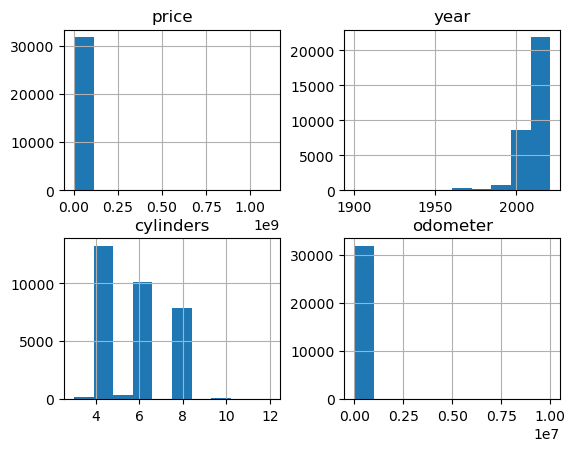

In [305]:
used_cars_cali.hist()

<Axes: >

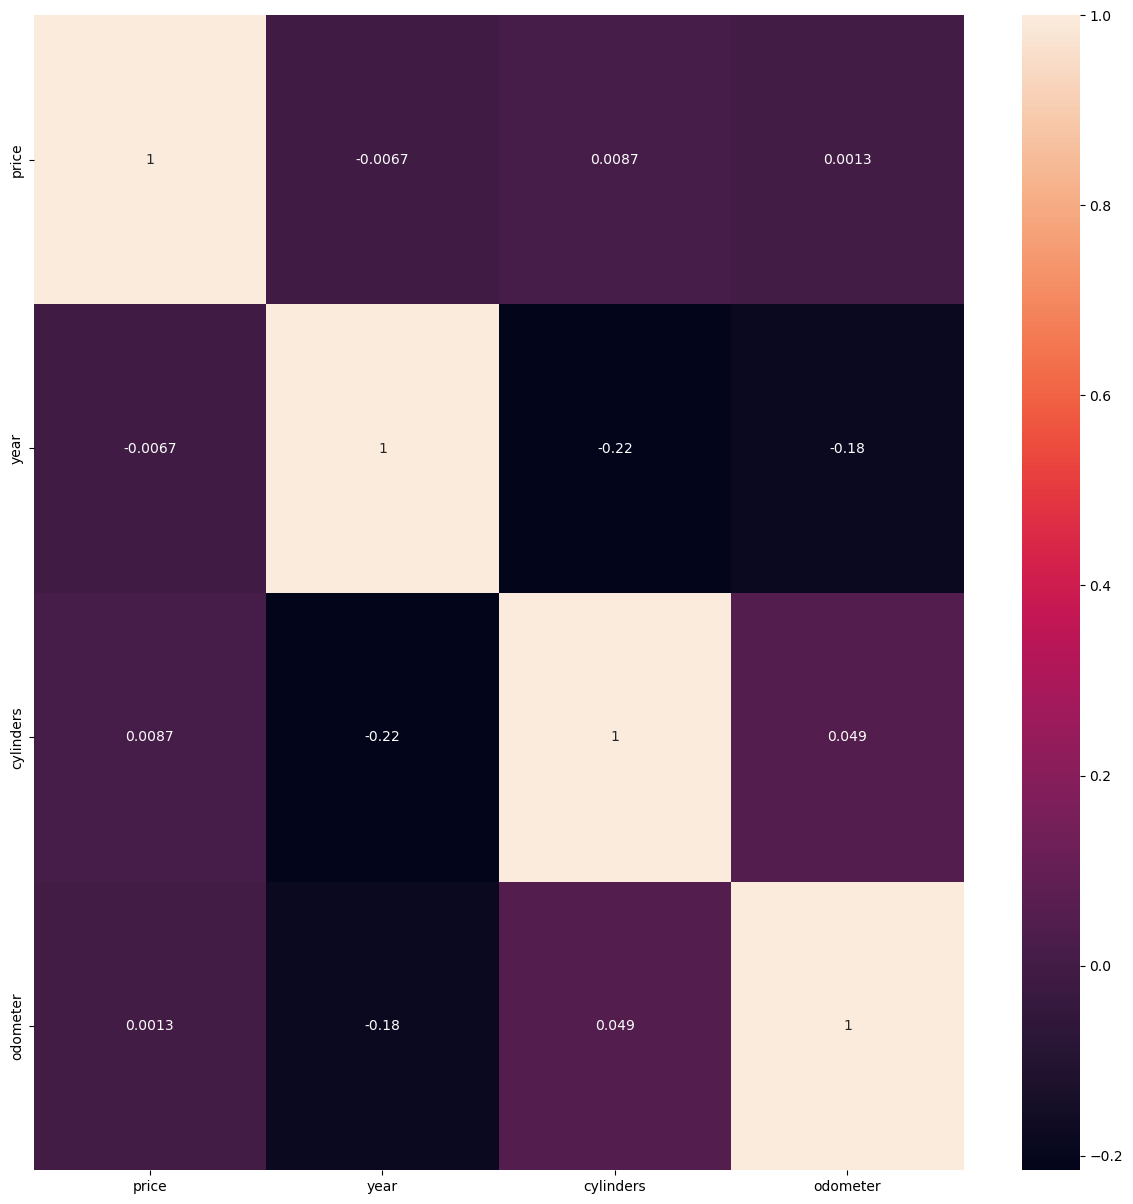

In [306]:
data_numeric_only = used_cars_cali.select_dtypes(include=['int64', 'float64'])
data_num_corr = data_numeric_only.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data_num_corr, annot=True, ax=ax)

In [307]:
used_cars_cali.groupby('condition')[['price']].mean()

,price
condition,
excellent,13671.506868
fair,5021.561772
good,102391.492916
like new,15229.236174
new,17917.601896
salvage,12697.591346


In [308]:
used_cars_cali.groupby('condition')[['price']].mean()

,price
condition,
excellent,13671.506868
fair,5021.561772
good,102391.492916
like new,15229.236174
new,17917.601896
salvage,12697.591346


<Axes: xlabel='price'>

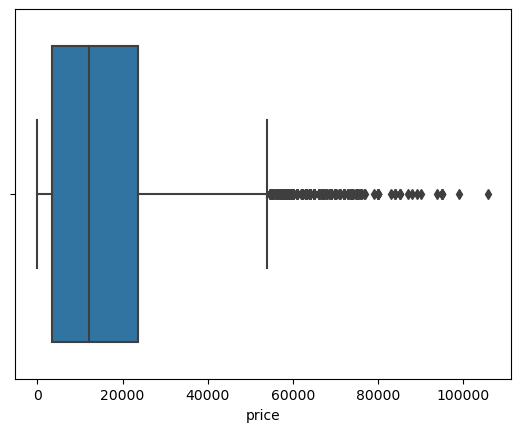

In [309]:
df = used_cars_cali.query('condition == "good" and price < 111111')
sns.boxplot(x=df['price'])

In [310]:
df.shape

(12768, 13)

In [311]:
df[['price']].mean()

price    15214.859023
dtype: float64

In [312]:
cond = (used_cars_cali['condition'] == "good") & (used_cars_cali['price'] >= 111111)
used_cars_cali['price'] = np.where(cond, np.nan, used_cars_cali['price'])

In [313]:
used_cars_cali  = used_cars_cali.dropna()
used_cars_cali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31772 entries, 21171 to 71779
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         31772 non-null  float64
 1   year          31772 non-null  float64
 2   manufacturer  31772 non-null  object 
 3   condition     31772 non-null  object 
 4   cylinders     31772 non-null  int64  
 5   fuel          31772 non-null  object 
 6   odometer      31772 non-null  float64
 7   title_status  31772 non-null  object 
 8   transmission  31772 non-null  object 
 9   drive         31772 non-null  object 
 10  size          31772 non-null  object 
 11  type          31772 non-null  object 
 12  paint_color   31772 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.4+ MB


<Axes: xlabel='price'>

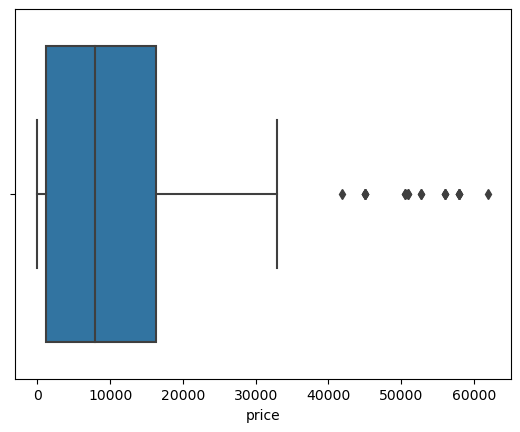

In [314]:
df = used_cars_cali.query('condition == "salvage"')
sns.boxplot(x=df['price'])

In [315]:
used_cars_cali.groupby('drive')[['price']].mean()

,price
drive,
4wd,19264.779706
fwd,9431.491898
rwd,16229.938470


In [316]:
used_cars_cali.groupby('type')[['price']].mean().reset_index().sort_values(by='price')

,type,price
5,mini-van,8475.200000
4,hatchback,9967.876157
9,sedan,10086.285577
12,wagon,11802.461300
0,SUV,12972.782321
6,offroad,15229.970000
3,coupe,15857.187394
2,convertible,17124.610951
11,van,17569.705240
1,bus,17827.000000


In [317]:
used_cars_cali.groupby('transmission')[['price']].mean().reset_index().sort_values(by='price')

,transmission,price
1,manual,13027.103496
0,automatic,13739.726934
2,other,25613.807475


array([[<Axes: title={'center': 'price'}>]], dtype=object)

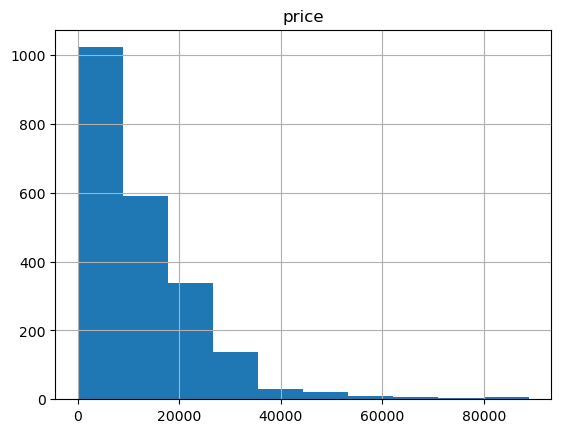

In [318]:
df = used_cars_cali.query('transmission == "manual" and price < 110000')[['price']]
df.hist()

In [319]:
df['price'].mean()

12630.842178126442

In [320]:
df.shape

(2167, 1)

In [321]:
cond = (used_cars_cali['transmission'] == "manual") & (used_cars_cali['price'] >= 110000)
used_cars_cali['price'] = np.where(cond, np.nan, used_cars_cali['price'])
used_cars_cali  = used_cars_cali.dropna()
used_cars_cali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31765 entries, 21171 to 71779
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         31765 non-null  float64
 1   year          31765 non-null  float64
 2   manufacturer  31765 non-null  object 
 3   condition     31765 non-null  object 
 4   cylinders     31765 non-null  int64  
 5   fuel          31765 non-null  object 
 6   odometer      31765 non-null  float64
 7   title_status  31765 non-null  object 
 8   transmission  31765 non-null  object 
 9   drive         31765 non-null  object 
 10  size          31765 non-null  object 
 11  type          31765 non-null  object 
 12  paint_color   31765 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.4+ MB


In [322]:
used_cars_cali.groupby('paint_color')[['price']].mean().reset_index().sort_values(by='price')

,paint_color,price
4,green,10178.968627
7,purple,11312.061224
1,blue,11602.013466
2,brown,11629.289665
5,grey,11735.807386
9,silver,12686.363654
3,custom,13478.298375
8,red,14216.348886
6,orange,15073.563452
11,yellow,15186.418750


,fuel,price
3,hybrid,11462.761905
2,gas,12966.992942
1,electric,14200.365079
4,other,21957.333333
0,diesel,30484.338932


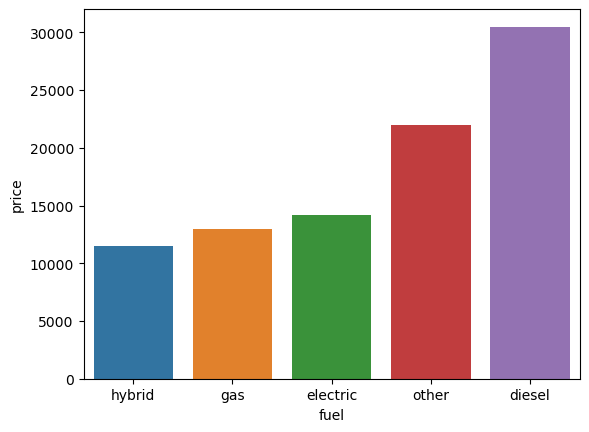

In [323]:
df = used_cars_cali.groupby('fuel')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='fuel', y='price')
df

In [324]:
df = used_cars_cali.query('fuel == "hybrid"')[['price', 'manufacturer']]
df['manufacturer'].value_counts()

manufacturer
toyota           358
ford              62
lexus             37
honda             37
chevrolet         37
hyundai           35
kia               20
lincoln           18
volvo              9
audi               8
nissan             7
mercedes-benz      5
bmw                3
infiniti           3
cadillac           2
jeep               2
mitsubishi         1
porsche            1
ram                1
chrysler           1
gmc                1
mercury            1
buick              1
rover              1
Name: count, dtype: int64

In [325]:
df = used_cars_cali.query('fuel == "gas"')[['price', 'manufacturer']]
df['manufacturer'].value_counts()

manufacturer
ford               4000
toyota             3415
chevrolet          3285
honda              2379
nissan             1777
bmw                1325
jeep               1164
mercedes-benz       989
dodge               921
hyundai             907
volkswagen          808
lexus               756
kia                 755
gmc                 681
subaru              667
ram                 545
mazda               484
acura               394
cadillac            389
audi                388
chrysler            337
infiniti            325
mini                208
buick               188
mitsubishi          175
porsche             153
rover               150
volvo               137
lincoln             107
pontiac              91
saturn               71
jaguar               61
fiat                 57
mercury              49
alfa-romeo           31
harley-davidson      14
datsun                7
ferrari               4
land rover            2
Name: count, dtype: int64

In [326]:
df['price'].mean()

12966.992942261313

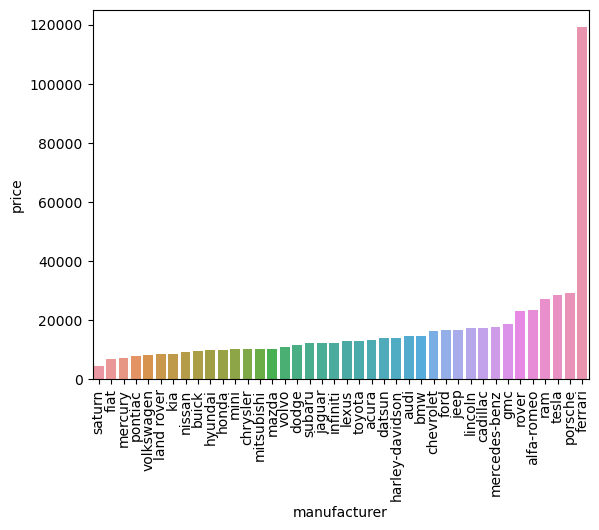

In [330]:

df = used_cars_cali.groupby('manufacturer')[['price']].mean().reset_index().sort_values(by='price')
sns.barplot(df, x='manufacturer', y='price')
plt.xticks(rotation=90);

In [339]:
oe_cond = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
oe_title = OrdinalEncoder(categories = [['missing', 'salvage', 'parts only', 'rebuilt', 'lien', 'clean']])
oe_size = OrdinalEncoder(categories = [['sub-compact', 'compact', 'mid-size', 'full-size']])

ohe = OneHotEncoder(drop = 'if_binary', sparse_output=False, handle_unknown="ignore")

ct = ColumnTransformer(transformers=[
    ("oe_cond", oe_cond, ['condition']),
    ("oe_title", oe_title, ['title_status']),
    ("oe_size", oe_size, ['size']),
    ("ohe", ohe, ['drive', 'type', 'fuel', 'transmission', 'manufacturer', 'paint_color'] )],
    remainder='passthrough'
)

ct.set_output(transform="pandas")
used_cars_cali_transformed = ct.fit_transform(used_cars_cali)
used_cars_cali_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31765 entries, 21171 to 71779
Data columns (total 83 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   oe_cond__condition                 31765 non-null  float64
 1   oe_title__title_status             31765 non-null  float64
 2   oe_size__size                      31765 non-null  float64
 3   ohe__drive_4wd                     31765 non-null  float64
 4   ohe__drive_fwd                     31765 non-null  float64
 5   ohe__drive_rwd                     31765 non-null  float64
 6   ohe__type_SUV                      31765 non-null  float64
 7   ohe__type_bus                      31765 non-null  float64
 8   ohe__type_convertible              31765 non-null  float64
 9   ohe__type_coupe                    31765 non-null  float64
 10  ohe__type_hatchback                31765 non-null  float64
 11  ohe__type_mini-van                 31765 non-null  floa

In [340]:
used_cars_cali_transformed.head()

,oe_cond__condition,oe_title__title_status,oe_size__size,ohe__drive_4wd,ohe__drive_fwd,ohe__drive_rwd,ohe__type_SUV,ohe__type_bus,ohe__type_convertible,ohe__type_coupe,...,ohe__paint_color_orange,ohe__paint_color_purple,ohe__paint_color_red,ohe__paint_color_silver,ohe__paint_color_white,ohe__paint_color_yellow,remainder__price,remainder__year,remainder__cylinders,remainder__odometer
21171,2.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,16990.0,2018.0,4,16930.0
21174,3.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11975.0,2003.0,8,207000.0
21175,2.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,4,47287.0
21176,3.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21950.0,2003.0,8,202537.0
21177,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020.0,8,9564.0


In [358]:
data_num_corr = used_cars_cali_transformed.corr().abs()

s = data_num_corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

so[80:120]

oe_size__size                      oe_size__size                        1.000000
ohe__manufacturer_harley-davidson  ohe__manufacturer_harley-davidson    1.000000
remainder__odometer                remainder__odometer                  1.000000
ohe__transmission_manual           ohe__transmission_automatic          0.758620
ohe__transmission_automatic        ohe__transmission_manual             0.758620
ohe__fuel_diesel                   ohe__fuel_gas                        0.661484
ohe__fuel_gas                      ohe__fuel_diesel                     0.661484
ohe__drive_fwd                     ohe__drive_4wd                       0.625922
ohe__drive_4wd                     ohe__drive_fwd                       0.625922
ohe__transmission_automatic        ohe__transmission_other              0.606047
ohe__transmission_other            ohe__transmission_automatic          0.606047
ohe__drive_fwd                     remainder__cylinders                 0.583252
remainder__cylinders        

##### Finding and Decisions:
1. No duplicated data entries
2. Quite a large number of NaN across columns, when dropped results in low number of entries ~ 35000 from 426K original entries
3. Instead of dropping NaN, need to fill data where appropriate
    a. Model and Manufacturer can fill each other
    b. Cylinders can be filled from Model
    c. Condition can be filled from year and odometer

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.